In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import requests
from bs4 import BeautifulSoup as bs
import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://flight.naver.com/'
driver = webdriver.Chrome('./chromedriver.exe')
driver.get(url)
time.sleep(2)
driver.maximize_window()

# 편도 클릭
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[4]/div/div/div[1]/button[2]/i').click()
time.sleep(1)

# 출발지 클릭
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[4]/div/div/div[2]/div[1]/button[1]').click()
time.sleep(1)

# 서울 입력
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[9]/div[1]/div/input').send_keys('서울')
time.sleep(1)

# 서울 선택
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[9]/div[2]/section/div/a[1]').click()
time.sleep(1)

# 도착지 클릭
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[4]/div/div/div[2]/div[1]/button[2]').click()
time.sleep(1)

# 제주 입력
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[9]/div[1]/div/input').send_keys('제주')
time.sleep(1)

# 제주 선택
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[9]/div[2]/section/div/a[1]').click()
time.sleep(1)

# 가는날 클릭 (내일로 8월 12일)
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[4]/div/div/div[2]/div[2]/button').click()
time.sleep(1)

# 월 선택
months = driver.find_elements(By.CLASS_NAME, 'month')
# print(len(months))

# 일 선택
days = months[0].find_elements(By.CLASS_NAME, 'num')
# print(len(days))
# print(days[14].text)
days[12].click()

# 항공권 검색 클릭
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[4]/div/div/button').click()
time.sleep(10)

for i in range(10):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);") #자바스크립트 함수
    time.sleep(2) #로딩중..

html = driver.page_source
driver.close()
driver.quit()

'<html><head><meta charset="utf-8"><meta http-equiv="x-ua-compatible" content="ie=edge"><title>네이버 항공권</title><meta name="description" content="설레는 여행의 시작. 네이버 항공권과 함께!"><meta property="og:title" content="네이버 항공권"><meta property="og:description" content="설레는 여행의 시작. 네이버 항공권과 함께!"><meta property="og:type" content="article"><meta property="og:article:author" content="네이버 항공권"><meta property="og:site_name" content="네이버 항공권"><meta property="og:image" content="https://m-flight.naver.com/images/og_image.png"><meta property="og:url" content="https://m-flight.naver.com"><meta property="twitter:card" content="summary_large_image"><meta property="twitter:title" content="네이버 항공권"><meta property="twitter:description" content="설레는 여행의 시작. 네이버 항공권과 함께!"><meta property="twitter:site" content="네이버 항공권"><meta property="twitter:image" content="https://m-flight.naver.com/images/og_image.png"><meta property="og:article:author" content="네이버 항공권"><meta name="viewport" content="width=device-width,initial-sca
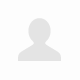
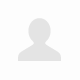

In [32]:
html

In [3]:
soup = bs(html, 'html.parser')

In [4]:
div_tags = soup.find_all('div', 'domestic_inner__15-bD')

In [18]:
div_tags[0]

<div class="domestic_inner__15-bD"><div class="layout_large__2AaMz"><div class="searchCondition_searchbox__1Df9W"><div class="inner"><div class="searchBox_searchBox__1vmcr in_list"><div class="searchBox_tablist__1uWMk" role="tablist"><button aria-disabled="false" aria-selected="false" class="searchBox_tab__cPM55 searchBox_Tab__39-OR" role="tab" type="button"><i class="searchBox_text__nUcMZ">왕복</i></button><button aria-disabled="false" aria-selected="true" class="searchBox_tab__cPM55 searchBox_Tab__39-OR" role="tab" type="button"><i class="searchBox_text__nUcMZ">편도</i></button><button aria-disabled="false" aria-selected="false" class="searchBox_tab__cPM55 searchBox_Tab__39-OR" role="tab" type="button"><i class="searchBox_text__nUcMZ">다구간</i></button></div><div class="searchBox_tabpanel__1BSGR" data-itinerary="1" data-triptype="OW" role="tabpanel"><div class="tabContent_routes__laamB"><button aria-disabled="false" aria-selected="false" class="tabContent_route__1GI8F select_City__2NOOZ st

In [5]:
soup=bs(html,'html.parser')
flights=soup.find_all('div','domestic_Flight__sK0eA result')

res=[]
for idx,flight in enumerate(flights):
    airline=flight.find('div','airline').text
    # time=flight[0].find_all('span','route_airport__3VT7M')
    depart_time=flight.find_all('span','route_airport__3VT7M')[0].find('b','route_time__-2Z1T').text
    arrival_time=flight.find_all('span','route_airport__3VT7M')[1].find('b','route_time__-2Z1T').text
    taken_time = flight.find('div', 'route_Route__2UInh').find('i', 'route_info__1RhUH').text
    fee = flight.find('i', 'domestic_num__2roTW').text
    card = flight.select('div.domestic_prices__3N88F div i')
    for i in card:
        if '카드' in i.text:
            card = i.text.split(' ')[0]
            break
        else:
            card = '없음'
    print(idx, card)
    # print(card)
    
    tmp={
        '항공사':airline,
        '출발시간':depart_time,
        '도착시간':arrival_time,
        '소요시간': taken_time,
        '가격': fee,
        '카드사': card
    }
    
    res.append(tmp)

0 KB국민카드
1 KB국민카드
2 삼성카드
3 삼성카드
4 삼성카드
5 삼성카드
6 삼성카드
7 삼성카드
8 삼성카드
9 삼성카드
10 KB국민카드
11 삼성카드
12 삼성카드
13 KB국민카드
14 KB국민카드
15 삼성카드
16 삼성카드
17 삼성카드
18 삼성카드
19 삼성카드
20 삼성카드
21 삼성카드
22 삼성카드
23 삼성카드
24 삼성카드
25 삼성카드
26 KB국민카드
27 삼성카드
28 삼성카드
29 삼성카드
30 삼성카드
31 삼성카드
32 삼성카드
33 삼성카드
34 삼성카드
35 삼성카드
36 삼성카드
37 삼성카드
38 삼성카드
39 삼성카드
40 삼성카드
41 삼성카드
42 삼성카드
43 삼성카드
44 삼성카드
45 삼성카드
46 삼성카드
47 삼성카드
48 삼성카드
49 삼성카드
50 삼성카드
51 삼성카드
52 삼성카드
53 삼성카드
54 KB국민카드
55 삼성카드
56 삼성카드
57 삼성카드
58 삼성카드
59 삼성카드
60 삼성카드
61 삼성카드
62 삼성카드
63 삼성카드
64 삼성카드
65 삼성카드
66 삼성카드
67 삼성카드


In [6]:
df=pd.DataFrame(res)

In [7]:
display(df)

,항공사,출발시간,도착시간,소요시간,가격,카드사
0,티웨이항공,06:40,07:50,01시간 10분,"132,500",KB국민카드
1,티웨이항공,11:45,12:55,01시간 10분,"132,500",KB국민카드
2,티웨이항공,14:05,15:15,01시간 10분,"132,200",삼성카드
3,에어부산,15:05,16:15,01시간 10분,"133,000",삼성카드
4,아시아나항공,16:35,17:50,01시간 15분,"123,000",삼성카드
...,...,...,...,...,...,...
63,대한항공,20:30,21:40,01시간 10분,"204,000",삼성카드
64,아시아나항공,20:50,22:00,01시간 10분,"93,000",삼성카드
65,아시아나항공,20:50,22:00,01시간 10분,"147,000",삼성카드
66,아시아나항공,21:20,22:30,01시간 10분,"99,000",삼성카드


In [8]:
len(flights)

68

In [70]:
card

[<i class="domestic_type__30RSq">할인석</i>,
 <i class="domestic_num__2roTW">108,900</i>,
 <i class="domestic_type__30RSq">KB국민카드 결제시 3% 청구할인</i>,
 <i class="domestic_num__2roTW">105,670</i>]

In [71]:
for i in card:
    print(i.text)

할인석
108,900
KB국민카드 결제시 3% 청구할인
105,670


In [74]:
for i in card:
    if '카드' in i.text:
        print(i.text.split(' ')[0])

KB국민카드


In [83]:
flights

[<div class="domestic_Flight__sK0eA result"><div class="domestic_inner__15-bD"><div class="domestic_schedule__1Whiq"><div class="domestic_item__2B--k"><div class="heading"><div class="airline"><div class="logos"><img alt="에어서울" class="logo" src="https://vertical.pstatic.net/vertical/static/flight/airlines/RS.png"/></div><b class="name">에어서울</b></div><div class="info"></div></div><div class="route_Route__2UInh"><span class="route_airport__3VT7M"><b class="route_time__-2Z1T">06:00</b><i class="route_code__3WUFO">GMP</i></span><span class="route_airport__3VT7M"><b class="route_time__-2Z1T">07:00</b><i class="route_code__3WUFO">CJU</i></span><i class="route_info__1RhUH">01시간 00분</i></div></div></div><button class="domestic_select_schedule__xWQ-K" type="button"></button><div class="domestic_prices__3N88F"><div class="domestic_item__2B--k"><i class="domestic_type__30RSq">할인석</i><b class="domestic_price__1qAgw"><span class="domestic_txt__2YFi_">편도 </span><i class="domestic_num__2roTW">108,900

In [9]:
df.head()

,항공사,출발시간,도착시간,소요시간,가격,카드사
0,티웨이항공,06:40,07:50,01시간 10분,"132,500",KB국민카드
1,티웨이항공,11:45,12:55,01시간 10분,"132,500",KB국민카드
2,티웨이항공,14:05,15:15,01시간 10분,"132,200",삼성카드
3,에어부산,15:05,16:15,01시간 10분,"133,000",삼성카드
4,아시아나항공,16:35,17:50,01시간 15분,"123,000",삼성카드


# 퀴즈

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [10]:
# 질문1 제주도 항공권 평균가격
df['가격']

0     132,500
1     132,500
2     132,200
3     133,000
4     123,000
       ...   
63    204,000
64     93,000
65    147,000
66     99,000
67    147,000
Name: 가격, Length: 68, dtype: object

In [11]:
tmp = []
for i in df['가격']:
    tmp.append(int(i.replace(',','')))
tmp

[132500,
 132500,
 132200,
 133000,
 123000,
 147000,
 133500,
 119900,
 134000,
 144000,
 132200,
 144000,
 133000,
 132200,
 189200,
 111000,
 147000,
 133000,
 99000,
 121000,
 147000,
 204000,
 204000,
 133500,
 101900,
 134000,
 132200,
 133000,
 98000,
 204000,
 93000,
 147000,
 98000,
 93000,
 147000,
 184000,
 93000,
 98000,
 110900,
 133500,
 147000,
 204000,
 204000,
 103900,
 133500,
 184500,
 93000,
 104000,
 132900,
 134000,
 147000,
 204000,
 204000,
 133500,
 132200,
 134000,
 103900,
 133500,
 95900,
 98000,
 103900,
 133500,
 133500,
 204000,
 93000,
 147000,
 99000,
 147000]

In [12]:
len(tmp)

68

In [13]:
df['가격1'] = tmp

In [14]:
df.head()

,항공사,출발시간,도착시간,소요시간,가격,카드사,가격1
0,티웨이항공,06:40,07:50,01시간 10분,"132,500",KB국민카드,132500
1,티웨이항공,11:45,12:55,01시간 10분,"132,500",KB국민카드,132500
2,티웨이항공,14:05,15:15,01시간 10분,"132,200",삼성카드,132200
3,에어부산,15:05,16:15,01시간 10분,"133,000",삼성카드,133000
4,아시아나항공,16:35,17:50,01시간 15분,"123,000",삼성카드,123000


In [15]:
df.dtypes

항공사     object
출발시간    object
도착시간    object
소요시간    object
가격      object
카드사     object
가격1      int64
dtype: object

In [20]:
int(df['가격1'].sum() / len(df))

136027

In [21]:
# 질문2 시간별 제주도 항공권 평균가격
df1 = df.copy()

In [22]:
df1.head()

,항공사,출발시간,도착시간,소요시간,가격,카드사,가격1
0,티웨이항공,06:40,07:50,01시간 10분,"132,500",KB국민카드,132500
1,티웨이항공,11:45,12:55,01시간 10분,"132,500",KB국민카드,132500
2,티웨이항공,14:05,15:15,01시간 10분,"132,200",삼성카드,132200
3,에어부산,15:05,16:15,01시간 10분,"133,000",삼성카드,133000
4,아시아나항공,16:35,17:50,01시간 15분,"123,000",삼성카드,123000


In [23]:
df1['출발시간']

0     06:40
1     11:45
2     14:05
3     15:05
4     16:35
      ...  
63    20:30
64    20:50
65    20:50
66    21:20
67    21:20
Name: 출발시간, Length: 68, dtype: object

In [25]:
df1['출발시간'].sort_values()

0     06:40
1     11:45
2     14:05
3     15:05
4     16:35
      ...  
63    20:30
64    20:50
65    20:50
66    21:20
67    21:20
Name: 출발시간, Length: 68, dtype: object

In [ ]:
'''
00:00 ~ 01:00 -> 0        12:00 ~ 13:00 -> 12
01:00 ~ 02:00 -> 1        13:00 ~ 14:00 -> 13
02:00 ~ 03:00 -> 2        14:00 ~ 15:00 -> 14
03:00 ~ 04:00 -> 3        15:00 ~ 16:00 -> 15
04:00 ~ 05:00 -> 4        16:00 ~ 17:00 -> 16
05:00 ~ 06:00 -> 5        17:00 ~ 18:00 -> 17
06:00 ~ 07:00 -> 6        18:00 ~ 19:00 -> 18
07:00 ~ 08:00 -> 7        19:00 ~ 20:00 -> 19
08:00 ~ 09:00 -> 8        20:00 ~ 21:00 -> 20
09:00 ~ 10:00 -> 9        21:00 ~ 22:00 -> 21
10:00 ~ 11:00 -> 10       22:00 ~ 23:00 -> 22
11:00 ~ 12:00 -> 11       23:00 ~ 24:00 -> 23
'''

In [27]:
df1['출발시간'][0][:2]

'06'

In [28]:
int('06')

6

In [29]:
tmp = []
for i in df1['출발시간']:
    tmp.append(i[:2])

In [30]:
tmp

['06',
 '11',
 '14',
 '15',
 '16',
 '16',
 '16',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '21',
 '21']

In [31]:
df1['시간별'] = tmp

In [32]:
df1.head()

,항공사,출발시간,도착시간,소요시간,가격,카드사,가격1,시간별
0,티웨이항공,06:40,07:50,01시간 10분,"132,500",KB국민카드,132500,06
1,티웨이항공,11:45,12:55,01시간 10분,"132,500",KB국민카드,132500,11
2,티웨이항공,14:05,15:15,01시간 10분,"132,200",삼성카드,132200,14
3,에어부산,15:05,16:15,01시간 10분,"133,000",삼성카드,133000,15
4,아시아나항공,16:35,17:50,01시간 15분,"123,000",삼성카드,123000,16


In [85]:
tmp = df1.groupby('시간별')['가격1'].mean().astype('int')
tmp

시간별
06    132500
11    132500
14    132200
15    133000
16    134500
17    142823
18    134500
19    141576
20    124620
21    123000
Name: 가격1, dtype: int32

<AxesSubplot:xlabel='시간별'>

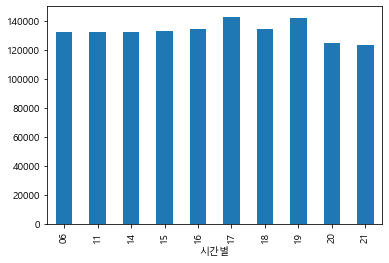

In [89]:
tmp.plot(kind='bar')

In [45]:
dict_time_mean = {
    '06': 132500,
    '11': 132500,
    '14': 132200,
    '15': 133000,
    '16': 134500,
    '17': 142823,
    '18': 134500,
    '19': 141576,
    '20': 124620,
    '21': 123000
}

In [46]:
df1['시간별'].map(dict_time_mean)

0     132500
1     132500
2     132200
3     133000
4     134500
       ...  
63    124620
64    124620
65    124620
66    123000
67    123000
Name: 시간별, Length: 68, dtype: int64

In [47]:
df1['시간별 평균가격'] = df1['시간별'].map(dict)

In [48]:
df1.head()

,항공사,출발시간,도착시간,소요시간,가격,카드사,가격1,시간별,시간별 평균가격
0,티웨이항공,06:40,07:50,01시간 10분,"132,500",KB국민카드,132500,06,132500
1,티웨이항공,11:45,12:55,01시간 10분,"132,500",KB국민카드,132500,11,132500
2,티웨이항공,14:05,15:15,01시간 10분,"132,200",삼성카드,132200,14,132200
3,에어부산,15:05,16:15,01시간 10분,"133,000",삼성카드,133000,15,133000
4,아시아나항공,16:35,17:50,01시간 15분,"123,000",삼성카드,123000,16,134500


In [83]:
df1['시간별 평균가격'].unique()

array([132500, 132200, 133000, 134500, 142823, 141576, 124620, 123000],
      dtype=int64)

In [92]:
# 질문3 항공사별 항공권 평균가격
tmp = df1.groupby('항공사')['가격1'].mean().astype('int')
tmp

항공사
대한항공      148076
아시아나항공    137090
에어부산      133000
에어서울      122450
제주항공      126500
진에어       133633
티웨이항공     139400
Name: 가격1, dtype: int32

<AxesSubplot:xlabel='항공사'>

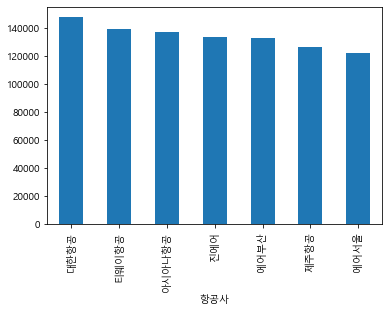

In [98]:
tmp = tmp.sort_values(ascending=False)
tmp.plot(kind='bar')

In [51]:
dict_airline_mean = {
    '대한항공'      : 148076,
    '아시아나항공'  : 137090,
    '에어부산'      : 133000,
    '에어서울'      : 122450,
    '제주항공'      : 126500,
    '진에어'        : 133633,
    '티웨이항공'    : 139400
}

In [90]:
tmp = df1['항공사'].map(dict_airline_mean)
tmp

0     139400
1     139400
2     139400
3     133000
4     137090
       ...  
63    148076
64    137090
65    137090
66    137090
67    137090
Name: 항공사, Length: 68, dtype: int64

In [53]:
df1['항공사별 평균가격'] = df1['항공사'].map(dict_airline_mean)

In [54]:
df1.head()

,항공사,출발시간,도착시간,소요시간,가격,카드사,가격1,시간별,시간별 평균가격,항공사별 평균가격
0,티웨이항공,06:40,07:50,01시간 10분,"132,500",KB국민카드,132500,06,132500,139400
1,티웨이항공,11:45,12:55,01시간 10분,"132,500",KB국민카드,132500,11,132500,139400
2,티웨이항공,14:05,15:15,01시간 10분,"132,200",삼성카드,132200,14,132200,139400
3,에어부산,15:05,16:15,01시간 10분,"133,000",삼성카드,133000,15,133000,133000
4,아시아나항공,16:35,17:50,01시간 15분,"123,000",삼성카드,123000,16,134500,137090


In [99]:
# 질문4 항공사별 운행횟수
tmp = df1['항공사'].value_counts()
tmp

아시아나항공    22
제주항공      14
대한항공      13
티웨이항공      8
에어부산       4
에어서울       4
진에어        3
Name: 항공사, dtype: int64

<AxesSubplot:>

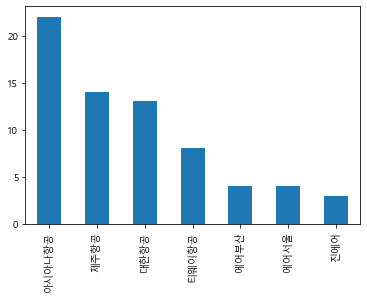

In [100]:
tmp.plot(kind='bar')

In [58]:
dict_airline_cnt = {
    '아시아나항공'  : 22,
    '제주항공'      : 14,
    '대한항공'      : 13,
    '티웨이항공'    : 8,
    '에어부산'      : 4,
    '에어서울'      : 4,
    '진에어'        : 3
}

In [59]:
df1['항공사'].map(dict_airline_cnt)

0      8
1      8
2      8
3      4
4     22
      ..
63    13
64    22
65    22
66    22
67    22
Name: 항공사, Length: 68, dtype: int64

In [60]:
df1['항공사별 운행횟수'] = df1['항공사'].map(dict_airline_cnt)

In [61]:
df1.head()

,항공사,출발시간,도착시간,소요시간,가격,카드사,가격1,시간별,시간별 평균가격,항공사별 평균가격,항공사별 운행횟수
0,티웨이항공,06:40,07:50,01시간 10분,"132,500",KB국민카드,132500,06,132500,139400,8
1,티웨이항공,11:45,12:55,01시간 10분,"132,500",KB국민카드,132500,11,132500,139400,8
2,티웨이항공,14:05,15:15,01시간 10분,"132,200",삼성카드,132200,14,132200,139400,8
3,에어부산,15:05,16:15,01시간 10분,"133,000",삼성카드,133000,15,133000,133000,4
4,아시아나항공,16:35,17:50,01시간 15분,"123,000",삼성카드,123000,16,134500,137090,22


In [101]:
# 질문5 시간대별 항공사별 운행 횟수
tmp = df1.groupby(['시간별', '항공사']).count()['출발시간']
tmp

시간별  항공사   
06   티웨이항공     1
11   티웨이항공     1
14   티웨이항공     1
15   에어부산      1
16   아시아나항공    2
     제주항공      1
17   대한항공      4
     아시아나항공    5
     에어부산      2
     에어서울      2
     제주항공      1
     티웨이항공     3
18   대한항공      5
     아시아나항공    8
     에어부산      1
     에어서울      2
     제주항공      2
     티웨이항공     1
19   대한항공      2
     아시아나항공    3
     제주항공      4
     진에어       3
     티웨이항공     1
20   대한항공      2
     아시아나항공    2
     제주항공      6
21   아시아나항공    2
Name: 출발시간, dtype: int64

In [108]:
tmp =tmp.sort_values(ascending=False)
tmp[:5]

시간별  항공사   
18   아시아나항공    8
20   제주항공      6
17   아시아나항공    5
18   대한항공      5
17   대한항공      4
Name: 출발시간, dtype: int64

<AxesSubplot:xlabel='시간별,항공사'>

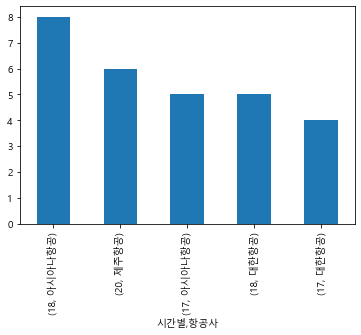

In [109]:
tmp[:5].plot(kind='bar')

In [76]:
tmp.index

MultiIndex([('06',  '티웨이항공'),
            ('11',  '티웨이항공'),
            ('14',  '티웨이항공'),
            ('15',   '에어부산'),
            ('16', '아시아나항공'),
            ('16',   '제주항공'),
            ('17',   '대한항공'),
            ('17', '아시아나항공'),
            ('17',   '에어부산'),
            ('17',   '에어서울'),
            ('17',   '제주항공'),
            ('17',  '티웨이항공'),
            ('18',   '대한항공'),
            ('18', '아시아나항공'),
            ('18',   '에어부산'),
            ('18',   '에어서울'),
            ('18',   '제주항공'),
            ('18',  '티웨이항공'),
            ('19',   '대한항공'),
            ('19', '아시아나항공'),
            ('19',   '제주항공'),
            ('19',    '진에어'),
            ('19',  '티웨이항공'),
            ('20',   '대한항공'),
            ('20', '아시아나항공'),
            ('20',   '제주항공'),
            ('21', '아시아나항공')],
           names=['시간별', '항공사'])

In [70]:
tmp.index[0]

('06', '티웨이항공')

In [71]:
tmp.index[0][0]

'06'

In [72]:
tmp.index[0][1]

'티웨이항공'

In [77]:
tmp.loc[('06', '티웨이항공')]

1

In [79]:
df1[(df1['시간별'] == tmp.index[0][0]) & (df1['항공사'] == tmp.index[0][1])]

,항공사,출발시간,도착시간,소요시간,가격,카드사,가격1,시간별,시간별 평균가격,항공사별 평균가격,항공사별 운행횟수
0,티웨이항공,06:40,07:50,01시간 10분,"132,500",KB국민카드,132500,06,132500,139400,8


In [82]:
tmp.unstack(1)

항공사,대한항공,아시아나항공,에어부산,에어서울,제주항공,진에어,티웨이항공
시간별,,,,,,,
06,NaN,NaN,NaN,NaN,NaN,NaN,1.0
11,NaN,NaN,NaN,NaN,NaN,NaN,1.0
14,NaN,NaN,NaN,NaN,NaN,NaN,1.0
15,NaN,NaN,1.0,NaN,NaN,NaN,NaN
16,NaN,2.0,NaN,NaN,1.0,NaN,NaN
17,4.0,5.0,2.0,2.0,1.0,NaN,3.0
18,5.0,8.0,1.0,2.0,2.0,NaN,1.0
19,2.0,3.0,NaN,NaN,4.0,3.0,1.0
20,2.0,2.0,NaN,NaN,6.0,NaN,NaN


In [110]:
# 질문6 카드사별 제휴 항공사 조사
df1.head()

,항공사,출발시간,도착시간,소요시간,가격,카드사,가격1,시간별,시간별 평균가격,항공사별 평균가격,항공사별 운행횟수
0,티웨이항공,06:40,07:50,01시간 10분,"132,500",KB국민카드,132500,06,132500,139400,8
1,티웨이항공,11:45,12:55,01시간 10분,"132,500",KB국민카드,132500,11,132500,139400,8
2,티웨이항공,14:05,15:15,01시간 10분,"132,200",삼성카드,132200,14,132200,139400,8
3,에어부산,15:05,16:15,01시간 10분,"133,000",삼성카드,133000,15,133000,133000,4
4,아시아나항공,16:35,17:50,01시간 15분,"123,000",삼성카드,123000,16,134500,137090,22


In [114]:
tmp = df1.groupby(['카드사', '항공사']).count()
tmp

출발시간  도착시간  소요시간  가격  가격1  시간별  시간별 평균가격  항공사별 평균가격  항공사별 운행횟수
카드사    항공사                                                                   
KB국민카드 티웨이항공      7     7     7   7    7    7         7          7          7
삼성카드   대한항공      13    13    13  13   13   13        13         13         13
       아시아나항공    22    22    22  22   22   22        22         22         22
       에어부산       4     4     4   4    4    4         4          4          4
       에어서울       4     4     4   4    4    4         4          4          4
       제주항공      14    14    14  14   14   14        14         14         14
       진에어        3     3     3   3    3    3         3          3          3
       티웨이항공      1     1     1   1    1    1         1          1          1

In [122]:
tmp.sort_values(['출발시간'], ascending=False)[['출발시간']]

출발시간
카드사    항공사         
삼성카드   아시아나항공    22
       제주항공      14
       대한항공      13
KB국민카드 티웨이항공      7
삼성카드   에어부산       4
       에어서울       4
       진에어        3
       티웨이항공      1

# 선생님이랑 다같이 한거

In [123]:
df = pd.read_csv('./data/data_jeju.csv')

In [124]:
df.head()

,Unnamed: 0,항공사,출발시간,도착시간,비행시간,항공금액(원),할인꿀팁,시간대,카드사
0,0,에어서울,06:00,07:00,01시간 00분,62900,KB국민카드 결제시 3% 청구할인,6,KB국민카드
1,1,에어서울,06:00,07:00,01시간 00분,134000,삼성카드 결제시 3% 캐시백,6,삼성카드
2,2,아시아나항공,06:05,07:15,01시간 10분,57000,"네이버페이 결제시 1%+1,500원 적립",6,네이버페이
3,3,아시아나항공,06:05,07:15,01시간 10분,87000,삼성카드 결제시 3% 캐시백,6,삼성카드
4,4,아시아나항공,06:05,07:15,01시간 10분,147000,삼성카드 결제시 3% 캐시백,6,삼성카드


In [125]:
df.shape

(220, 9)

In [126]:
df.groupby(['카드사', '시간대']).count()

Unnamed: 0  항공사  출발시간  도착시간  비행시간  항공금액(원)  할인꿀팁
카드사         시간대                                                  
KB국민카드      6             5    5     5     5     5        5     5
            7             1    1     1     1     1        1     1
            8             4    4     4     4     4        4     4
            9             3    3     3     3     3        3     3
            11            2    2     2     2     2        2     2
            12            3    3     3     3     3        3     3
            13            5    5     5     5     5        5     5
            14            2    2     2     2     2        2     2
            15            1    1     1     1     1        1     1
네이버페이       6             6    6     6     6     6        6     6
            12            4    4     4     4     4        4     4
            13            4    4     4     4     4        4     4
            14            6    6     6     6     6        6     6
            15            6    6     6     6     6        6     6
            16            1    1     1     1     1        1     1
롯데카드        6             1    1     1     1     1        1     1
            7             2    2     2     2     2        2     2
            11            2    2     2     2     2        2     2
            14            1    1     1     1     1        1     1
            15            1    1     1     1     1        1     1
삼성카드        6            23   23    23    23    23       23    23
            7            17   17    17    17    17       17    17
            8            12   12    12    12    12       12    12
            9             8    8     8     8     8        8     8
            10           14   14    14    14    14       14    14
            11           14   14    14    14    14       14    14
            12           11   11    11    11    11       11    11
            13           12   12    12    12    12       12    12
            14           20   20    20    20    20       20    20
            15           13   13    13    13    13       13    13
            16            5    5     5     5     5        5     5
없음          8             1    1     1     1     1        1     1
하나 신용/체크카드  6             1    1     1     1     1        1     1
            7             1    1     1     1     1        1     1
            8             1    1     1     1     1        1     1
            11            2    2     2     2     2        2     2
            12            1    1     1     1     1        1     1
            13            1    1     1     1     1        1     1
            14            2    2     2     2     2        2     2
            15            1    1     1     1     1        1     1

In [128]:
tmp = df.groupby(['카드사', '시간대']).count()['항공사']
tmp

카드사          시간대
KB국민카드       6       5
             7       1
             8       4
             9       3
             11      2
             12      3
             13      5
             14      2
             15      1
네이버페이        6       6
             12      4
             13      4
             14      6
             15      6
             16      1
롯데카드         6       1
             7       2
             11      2
             14      1
             15      1
삼성카드         6      23
             7      17
             8      12
             9       8
             10     14
             11     14
             12     11
             13     12
             14     20
             15     13
             16      5
없음           8       1
하나 신용/체크카드   6       1
             7       1
             8       1
             11      2
             12      1
             13      1
             14      2
             15      1
Name: 항공사, dtype: int64

<AxesSubplot:xlabel='카드사,시간대'>

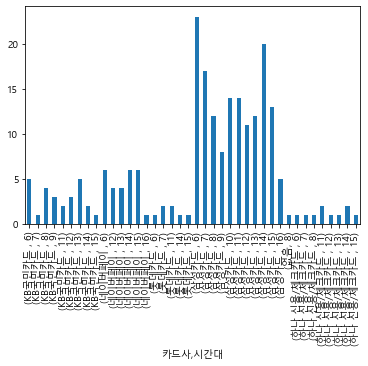

In [129]:
tmp.plot(kind='bar')

In [130]:
df[df['카드사'] == '삼성카드']

,Unnamed: 0,항공사,출발시간,도착시간,비행시간,항공금액(원),할인꿀팁,시간대,카드사


In [132]:
df.dtypes

Unnamed: 0     int64
항공사           object
출발시간          object
도착시간          object
비행시간          object
항공금액(원)        int64
할인꿀팁          object
시간대            int64
카드사           object
dtype: object

In [133]:
df['카드사'] == '삼성카드'

0      False
1      False
2      False
3      False
4      False
       ...  
215    False
216    False
217    False
218    False
219    False
Name: 카드사, Length: 220, dtype: bool

In [135]:
df['카드사'] = [i.strip() for i in df['카드사']]

In [136]:
df['카드사'].unique()

array(['KB국민카드', '삼성카드', '네이버페이', '하나 신용/체크카드', '롯데카드', '없음'],
      dtype=object)

In [151]:
tmp = df[df['카드사']=='삼성카드']
tmp

,Unnamed: 0,항공사,출발시간,도착시간,비행시간,항공금액(원),할인꿀팁,시간대,카드사
1,1,에어서울,06:00,07:00,01시간 00분,134000,삼성카드 결제시 3% 캐시백,6,삼성카드
3,3,아시아나항공,06:05,07:15,01시간 10분,87000,삼성카드 결제시 3% 캐시백,6,삼성카드
4,4,아시아나항공,06:05,07:15,01시간 10분,147000,삼성카드 결제시 3% 캐시백,6,삼성카드
5,5,아시아나항공,06:05,07:15,01시간 10분,184000,삼성카드 결제시 3% 캐시백,6,삼성카드
7,7,아시아나항공,06:10,07:20,01시간 10분,87000,삼성카드 결제시 3% 캐시백,6,삼성카드
...,...,...,...,...,...,...,...,...,...
214,214,대한항공,16:10,17:20,01시간 10분,58000,삼성카드 결제시 3% 캐시백,16,삼성카드
216,216,대한항공,16:25,17:35,01시간 10분,52000,삼성카드 결제시 3% 캐시백,16,삼성카드
217,217,진에어,16:25,17:35,01시간 10분,58900,삼성카드 결제시 3.8% 캐시백,16,삼성카드
218,218,진에어,16:25,17:35,01시간 10분,134000,삼성카드 결제시 3.8% 캐시백,16,삼성카드


In [152]:
tmp.groupby('시간대').count()['출발시간']

시간대
6     23
7     17
8     12
9      8
10    14
11    14
12    11
13    12
14    20
15    13
16     5
Name: 출발시간, dtype: int64

In [153]:
tmp.groupby('시간대').count()['출발시간'].dtypes

dtype('int64')

In [154]:
tmp = df[df['카드사']=='삼성카드']
tmp.groupby('시간대').count()['출발시간'].dtypes

dtype('int64')

In [142]:
tmp.groupby('시간대').count()['출발시간'].sort_values(ascending=False)

시간대
6     23
14    20
7     17
10    14
11    14
15    13
8     12
13    12
12    11
9      8
16     5
Name: 출발시간, dtype: int64

<AxesSubplot:xlabel='시간대'>

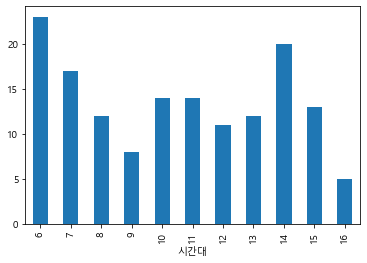

In [143]:
tmp.groupby('시간대').count()['출발시간'].plot(kind='bar')

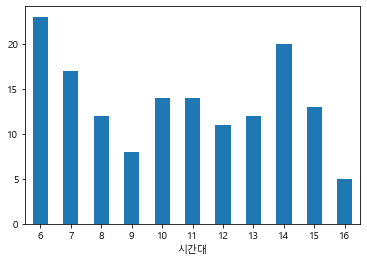

In [145]:
tmp.groupby('시간대').count()['출발시간'].plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [147]:
card_names = df['카드사'].unique()
card_names

array(['KB국민카드', '삼성카드', '네이버페이', '하나 신용/체크카드', '롯데카드', '없음'],
      dtype=object)

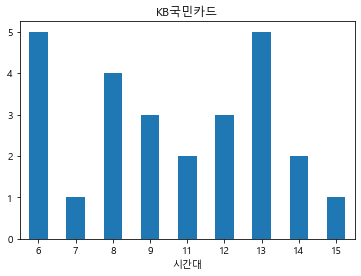

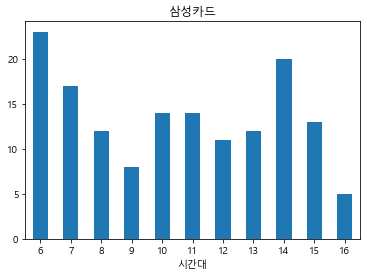

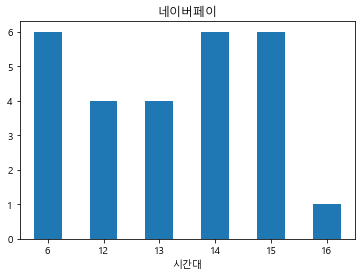

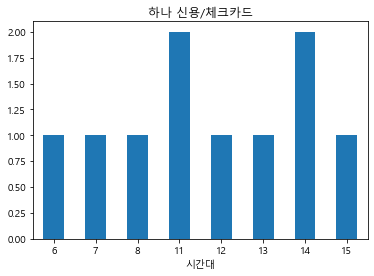

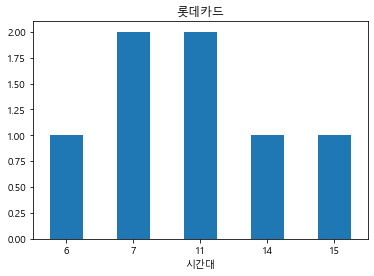

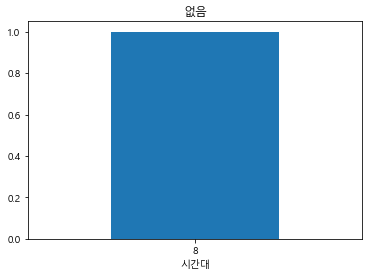

In [149]:
for name in card_names:
    tmp = df[df['카드사']==name]
    tmp.groupby('시간대').count()['출발시간'].plot(kind='bar')
    plt.xticks(rotation=0)
    plt.title(name)
    plt.show()

시간대
8    1
Name: 출발시간, dtype: int64